# **A Study on Predicting Red Wine Quality Based on Physicochemical Properties**

## **Introduction**
This project focuses on the classification of wine quality using machine learning techniques. The dataset used is the **Wine Quality Dataset** from the UCI Machine Learning Repository. The workflow involves data preprocessing, exploratory data analysis (EDA), feature engineering, model training, evaluation, and hyperparameter tuning. Various models, including logistic regression, decision trees, random forests, support vector machines (SVMs), and ensemble learning techniques, are implemented.

## **1. Importing Libraries**

### **Overview**
- Essential libraries for data manipulation, visualization, and modeling are imported.
- `warnings` is used to suppress unnecessary warnings.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
np.random.seed(42)

## **2. Loading and Preprocessing the Dataset**

### **Overview**
- `categorize_quality`: Converts numerical quality ratings into categorical labels: **Low, Medium, High**.
- `load_data`: Reads the dataset, applies the categorization function, and removes the original `quality` column.


In [3]:
def categorize_quality(value):
    if value <= 4:
        return 'Low'
    elif 5 <= value <= 6:
        return 'Medium'
    else:
        return 'High'

def load_data(url):
    df = pd.read_csv(url, delimiter=';')
    df['quality_label'] = df['quality'].apply(categorize_quality)
    df.drop(columns=['quality'], inplace=True)
    print("Class distribution:\n", df['quality_label'].value_counts())
    return df

def analyze_missing_values(df):
    # Calculate missing values
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    
    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Missing Values': missing,
        'Percentage': missing_percent,
        'Data Type': df.dtypes
    })
    
    # Sort by number of missing values
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values('Missing Values', ascending=False)
    
    if len(missing_summary) > 0:
        print("Missing Values Summary:")
        print(missing_summary)
        
        # Visualize missing values
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_summary.index, y='Percentage', data=missing_summary)
        plt.xticks(rotation=45)
        plt.title('Percentage of Missing Values by Feature')
        plt.ylabel('Percentage Missing')
        plt.tight_layout()
        plt.show()
        
        # Correlation of missing values
        if len(missing_summary) > 1:
            missing_corr = df.isnull().corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(missing_corr, annot=True, cmap='coolwarm')
            plt.title('Correlation of Missing Values')
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values found in the dataset!")
    
    # Additional insights about missingness patterns
    if len(missing_summary) > 0:
        print("\nMissingness Patterns:")
        print(f"Total number of missing values: {missing.sum()}")
        print(f"Number of rows with at least one missing value: {df.isnull().any(axis=1).sum()}")
        print(f"Percentage of rows with missing values: {(df.isnull().any(axis=1).sum() / len(df)) * 100:.2f}%")

## **3. Handling Missing Values**

### **Overview**
- Identifies missing values in the dataset.
- Displays missing values as percentages.
- **Objective**: Identifies missing values and calculates their percentage.
- **Outcome**: In this dataset, **no missing values were found**.

### **1.3 Univariate Analysis**

- **Objective**: Understand the **distribution** of individual numerical features.
- **Visualization**: Histograms and KDE (Kernel Density Estimation) plots are used to analyze the **shape of data distribution**.
- **Findings**:
  - Most features are **skewed**, requiring possible **scaling or transformation**.
  - Some features have **outliers**, which will be addressed in preprocessing.

### **1.4 Bivariate Analysis**

- **Objective**: Examine relationships between features and **target variable (`quality_label`)**.
- **Visualization**: Correlation **heatmaps** and **boxplots**.
- **Findings**:
  - **Alcohol** has a strong **positive correlation** with quality.
  - **Volatile acidity** has a **negative correlation** with quality.
  - Some features are **highly correlated**, indicating potential **multicollinearity**.

### **1.5 Multivariate Analysis**

- **Objective**: Understand interactions between multiple features.
- **Visualization**: **Pair plots** to identify relationships between variables.
- **Findings**:
  - Some variables show **linear separability** between quality classes.
  - Overlapping regions suggest the need for **feature engineering** or **non-linear models**.

In [6]:
def univariate_analysis(df):
    plt.figure(figsize=(16, 12))
    for i, column in enumerate(df.columns, 1):
        if pd.api.types.is_numeric_dtype(df[column]):
            plt.subplot(3, 4, i)
            sns.histplot(df[column], kde=True)
            plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(16, 12))
    for i, column in enumerate(df.columns, 1):
        if pd.api.types.is_numeric_dtype(df[column]):
            plt.subplot(3, 4, i)
            sns.boxplot(y=df[column])
            plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

    print("Summary statistics:\n", df.describe())

def bivariate_analysis(df, target_col='quality_label'):
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    for column in numeric_df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[target_col], y=df[column])
        plt.title(f'{column} vs {target_col}')
        plt.show()

def multivariate_analysis(df):
    sns.pairplot(df, hue='quality_label')
    plt.show()

def significance_testing(df, target_col='quality_label'):
    from scipy.stats import f_oneway
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]) and column != target_col:
            groups = [df[df[target_col] == label][column] for label in df[target_col].unique()]
            stat, p_value = f_oneway(*groups)
            print(f"ANOVA for {column} and {target_col}: Stat = {stat:.4f}, p-value = {p_value:.4f}")
            if p_value < 0.05:
                print(f"  -> Significant difference in {column} across {target_col}\n")
            else:
                print(f"  -> No significant difference in {column} across {target_col}\n")



## **4. Exploratory Data Analysis (EDA)**

EDA and preprocessing are crucial steps in any machine learning project. They help in understanding the dataset, identifying patterns, handling missing values, and preparing the data for model training. Below are the key steps performed in this project:

### **1.1 Understanding the Data**
- The dataset used in this project is the **Wine Quality Dataset** from the **UCI Machine Learning Repository**.
- The dataset contains **numerical features** representing chemical properties of wines and a **quality score** ranging from **3 to 9**.
- The dataset is loaded using the `load_data()` function, which also categorizes wine quality into **three classes**: **Low, Medium, and High**.

### **2.1 Feature Engineering**

#### **Steps:**
1. **Feature Scaling**:
   - **Why?** Many features have **different scales**, which can affect model performance.
   - **Method Used:** **`RobustScaler()`** (more robust to outliers compared to standardization or min-max scaling).

2. **Polynomial Feature Expansion**:
   - **Why?** Adds **non-linear interactions** to improve model performance.
   - **Method Used:** **`PolynomialFeatures(degree=2)`** to generate squared terms.

In [8]:
from sklearn.preprocessing import RobustScaler, PolynomialFeatures

def preprocess_features(df, poly_degree=2, include_bias=False):
    X = df.drop(columns=['quality_label'])
    y = df['quality_label']
    
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    
    poly = PolynomialFeatures(degree=poly_degree, include_bias=include_bias)
    X_poly = poly.fit_transform(X_scaled)
    
    feature_names = poly.get_feature_names_out(X.columns)
    X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
    
    return X_poly_df, y


### **2.2 Handling Class Imbalance**

#### **Steps:**
1. **Class Distribution Check**:
   - The dataset is **imbalanced** (`Medium` wines are overrepresented).
   - **Solution:** Use **SMOTE (Synthetic Minority Over-sampling Technique)** to balance classes.

2. **Why SMOTE?**
   - Generates **synthetic samples** rather than simply duplicating existing data.
   - Helps models **learn better** for underrepresented classes.

In [10]:
def resample_data(X, y, method='SMOTE'):
    if method.upper() == 'SMOTE':
        from imblearn.over_sampling import SMOTE
        sampler = SMOTE(random_state=42)
    elif method.upper() == 'ADASYN':
        from imblearn.over_sampling import ADASYN
        sampler = ADASYN(random_state=42)
    else:
        raise ValueError("Resampling method must be 'SMOTE' or 'ADASYN'")
    
    X_res, y_res = sampler.fit_resample(X, y)
    print(f"After {method} resampling, class distribution:\n", pd.Series(y_res).value_counts())
    return X_res, y_res

### **Model Evaluation Function**

#### **Overview**
The function `evaluate_model` is used to assess the performance of a trained machine learning model. It calculates and displays various evaluation metrics, including **accuracy, classification report, confusion matrix, and ROC-AUC score**. This function supports both **probabilistic classifiers** (those that output probabilities) and **non-probabilistic classifiers**.


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.4f}".format(acc))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    classes = np.unique(y_test)
    y_test_bin = label_binarize(y_test, classes=classes)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        if len(classes) == 2:
            y_score = np.column_stack([1 - y_score, y_score])
    else:
        y_score = None

    if y_score is not None:
        try:
            auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
            print("Macro ROC AUC: {:.4f}".format(auc))
        except Exception as e:
            print("ROC AUC could not be computed:", e)
    else:
        print("Model does not provide probability estimates.")
    return y_pred


# **Hyperparameter Tuning using RandomizedSearchCV**

## **Overview**
Hyperparameter tuning is a critical step in optimizing machine learning models. This function leverages **RandomizedSearchCV** from scikit-learn to efficiently search for the best hyperparameter combination for a given model. Unlike **GridSearchCV**, which exhaustively searches all possible combinations, **RandomizedSearchCV** samples a subset of combinations, making it computationally efficient while still achieving competitive results.

## **Objectives**
- **Optimize model performance** by selecting the best hyperparameters.
- **Reduce computation time** compared to exhaustive grid search.
- **Improve generalization** by using cross-validation (`cv=3` by default).
- **Enable parallel processing** (`n_jobs=-1`) for faster execution.
- **Return the best-performing model** based on accuracy scoring.


In [54]:
from sklearn.model_selection import RandomizedSearchCV

def hyperparameter_tuning(model, param_dist, X_train, y_train, cv=3, n_iter=20):
    random_search = RandomizedSearchCV(model, 
                                     param_distributions=param_dist, 
                                     n_iter=n_iter, 
                                     cv=cv, 
                                     scoring='accuracy',
                                     random_state=42,
                                     n_jobs=-1)
    random_search.fit(X_train, y_train)
    print("Best parameters: ", random_search.best_params_)
    print("Best CV score: {:.4f}".format(random_search.best_score_))
    return random_search.best_estimator_

# **Stacking Ensemble and SHAP Analysis**

## **Overview**
This section implements a **stacking ensemble** approach to improve classification performance by combining multiple base models. Stacking is a type of ensemble learning that **leverages the strengths of multiple models** and combines their predictions using a final meta-classifier. Additionally, **SHAP (SHapley Additive exPlanations) analysis** is performed to interpret model decisions and assess feature importance.

## **Objectives**
- **Enhance model accuracy and robustness** by using a stacking ensemble.
- **Combine diverse models** (Random Forest, SVM, Gradient Boosting) to capture different patterns in the data.
- **Use Logistic Regression as the meta-classifier** to integrate base model predictions.
- **Improve model interpretability** using **SHAP analysis** to identify feature contributions.
- **Support tree-based and kernel-based models** for SHAP explanations.


In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def stacking_ensemble(X_train, y_train):
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('svc', SVC(kernel='linear', probability=True, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]
    final_estimator = LogisticRegression(max_iter=1000, random_state=42)
    stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
    stacking_clf.fit(X_train, y_train)
    return stacking_clf

def shap_analysis(model, X_sample):
    import shap
    if hasattr(model, 'feature_importances_') or hasattr(model, 'get_booster'):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_sample)
        shap.summary_plot(shap_values, X_sample, plot_type="bar")
    else:
        explainer = shap.KernelExplainer(model.predict_proba, X_sample, link="logit")
        shap_values = explainer.shap_values(X_sample, nsamples=100)
        shap.summary_plot(shap_values, X_sample)


# **Data Loading and Exploratory Data Analysis (EDA)**

## **Overview**
This section focuses on **loading the dataset** and performing **Exploratory Data Analysis (EDA)** to understand the data distribution, relationships, and potential patterns. The dataset used is the **Wine Quality Dataset** from the **UCI Machine Learning Repository**. The analysis includes **missing value detection, univariate analysis, bivariate analysis, multivariate analysis, and statistical significance testing**.

## **Objectives**
- **Load the dataset** from an external source and prepare it for analysis.
- **Identify missing values** and assess their impact on the dataset.
- **Perform univariate analysis** to understand feature distributions.
- **Conduct bivariate analysis** to examine relationships between variables.
- **Perform multivariate analysis** to uncover complex interactions between features.
- **Test statistical significance** of relationships between features and target labels.


Class distribution:
 quality_label
Medium    1319
High       217
Low         63
Name: count, dtype: int64

--- missing value analysis ---
No missing values found in the dataset!

--- Univariate Analysis ---


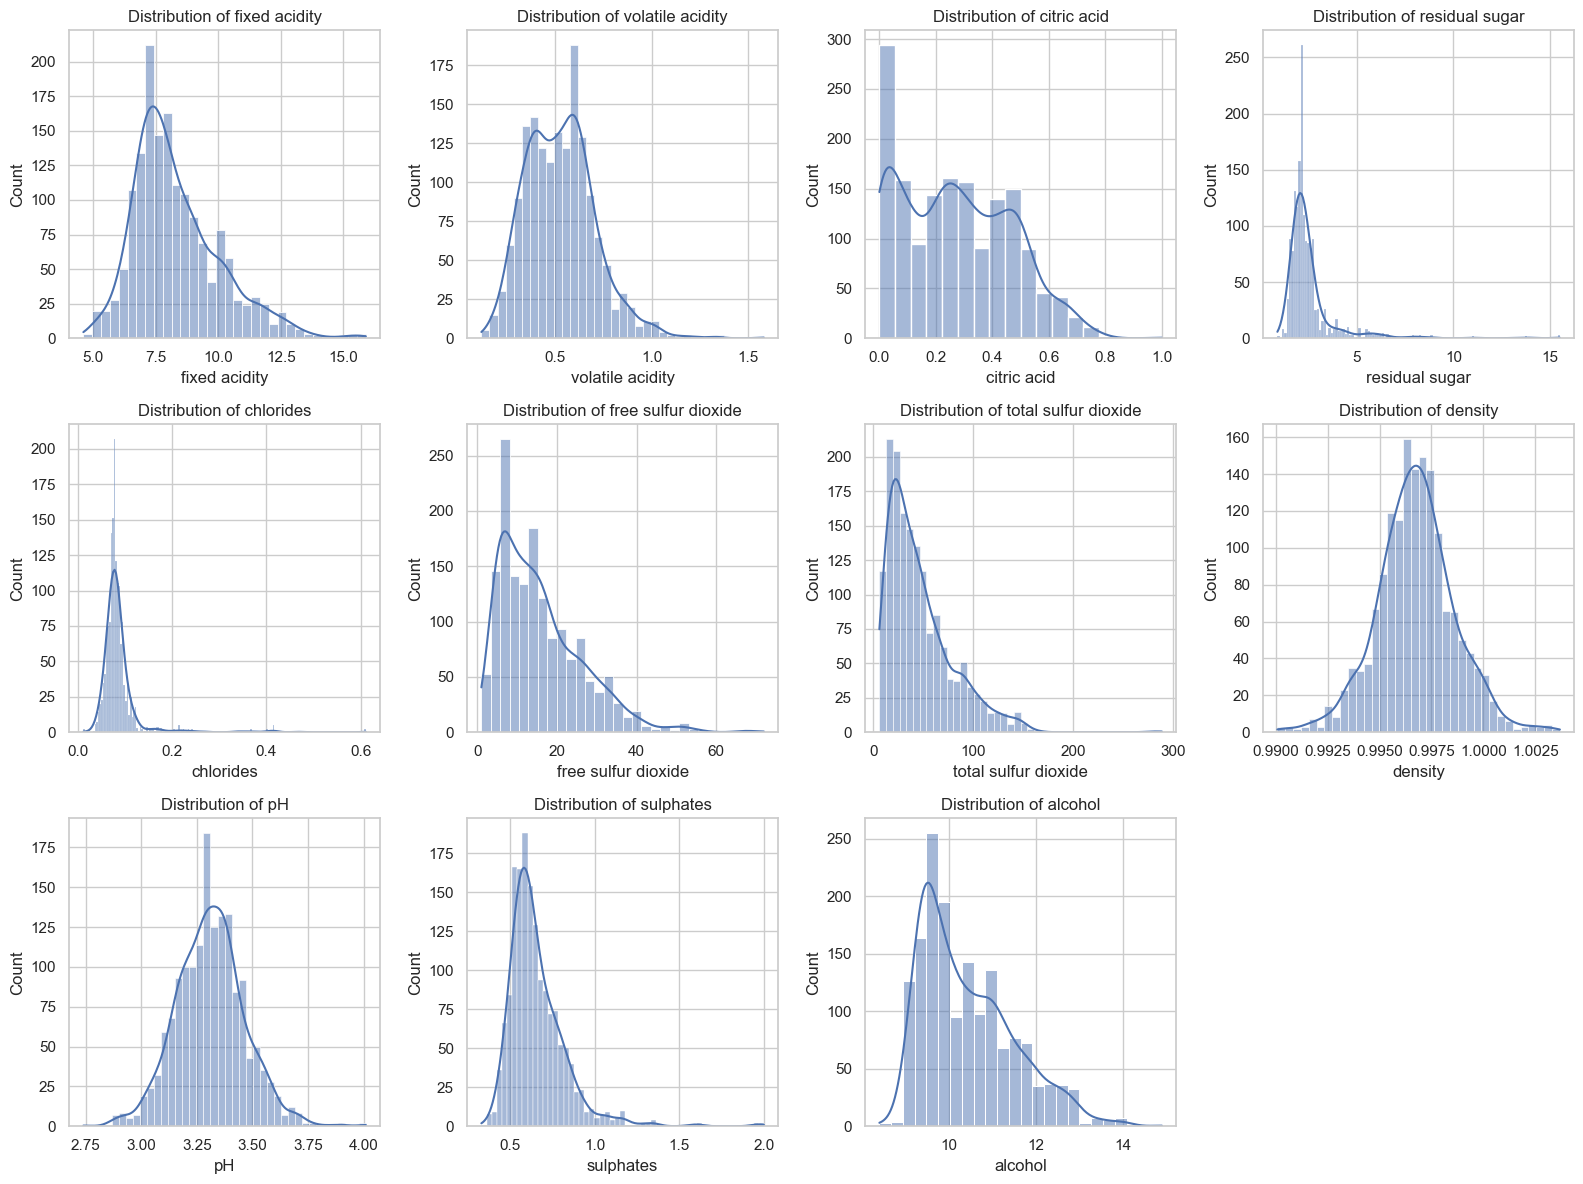

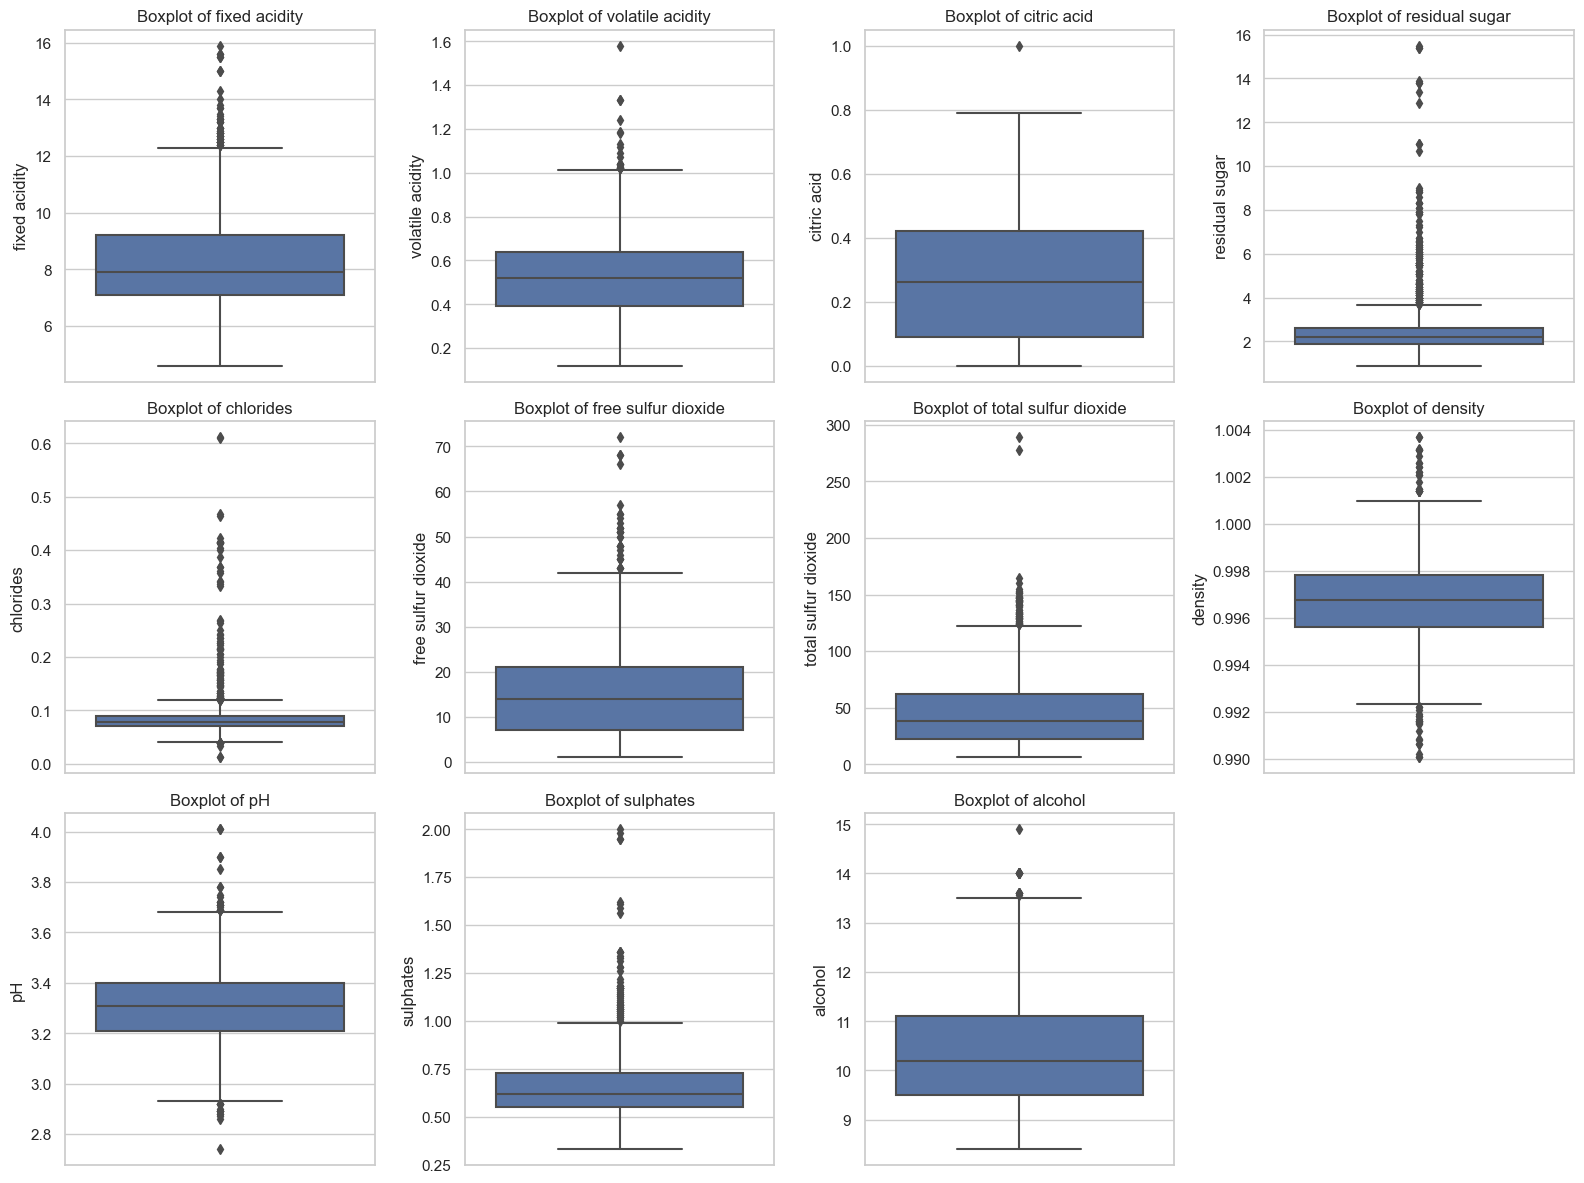

Summary statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

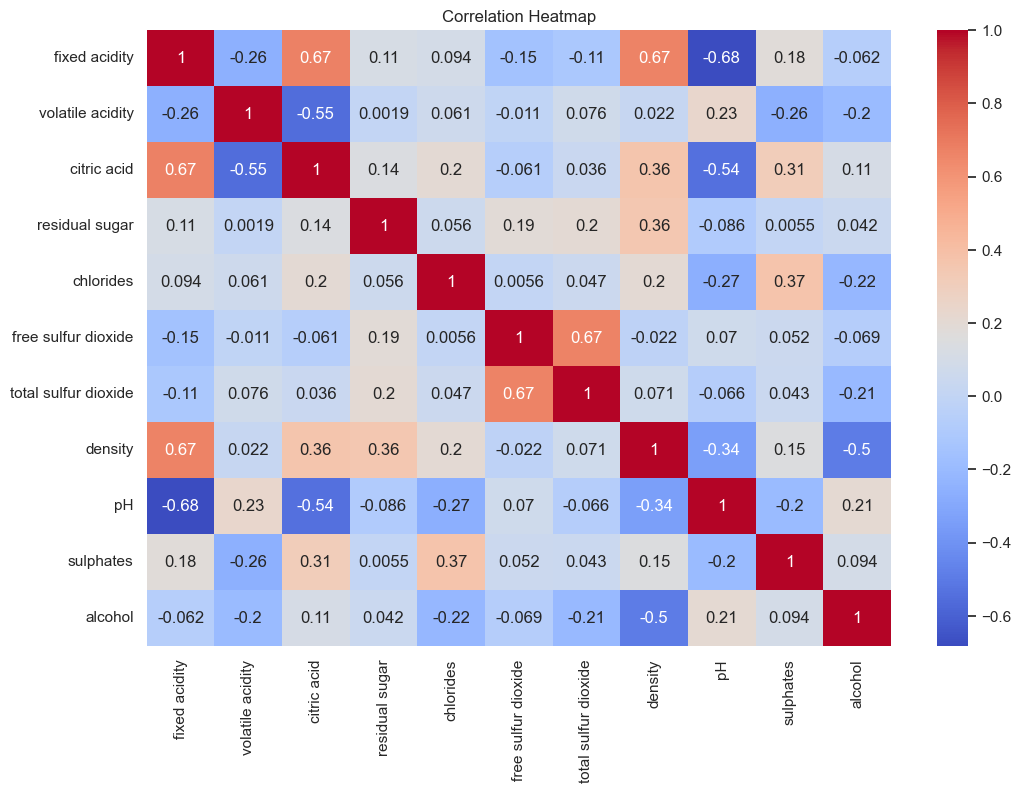

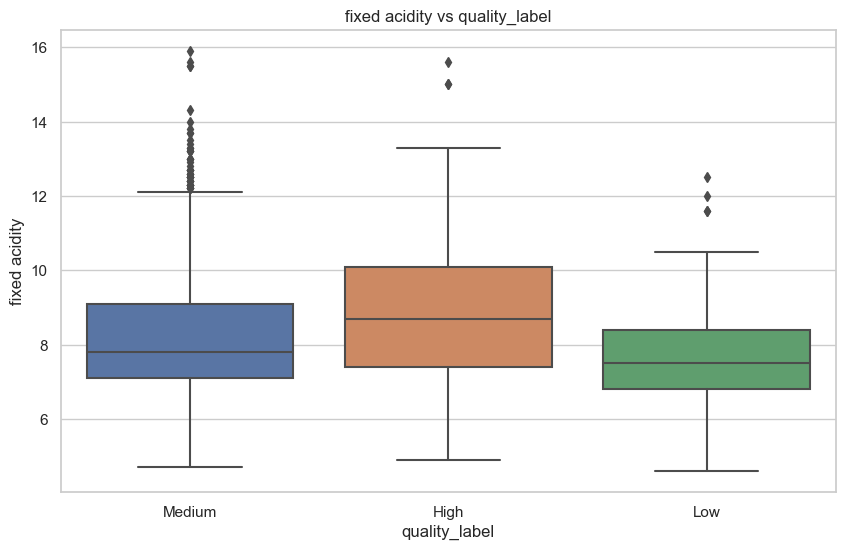

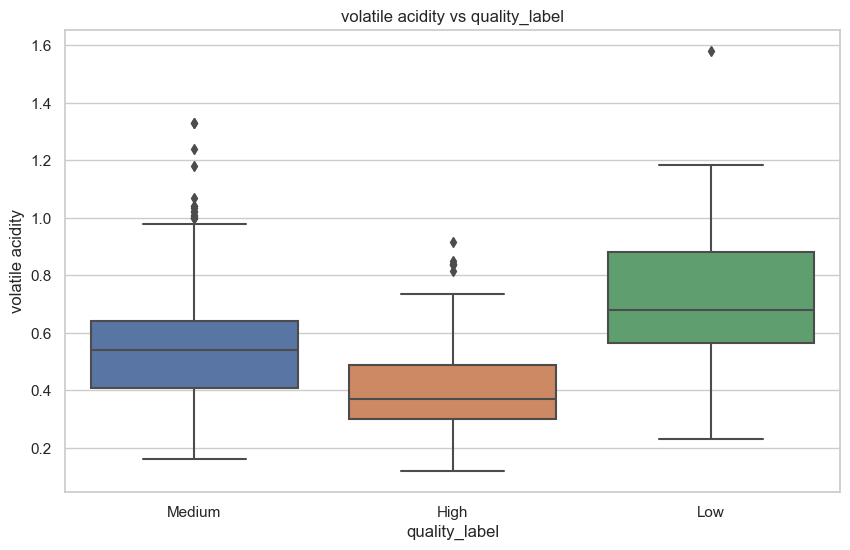

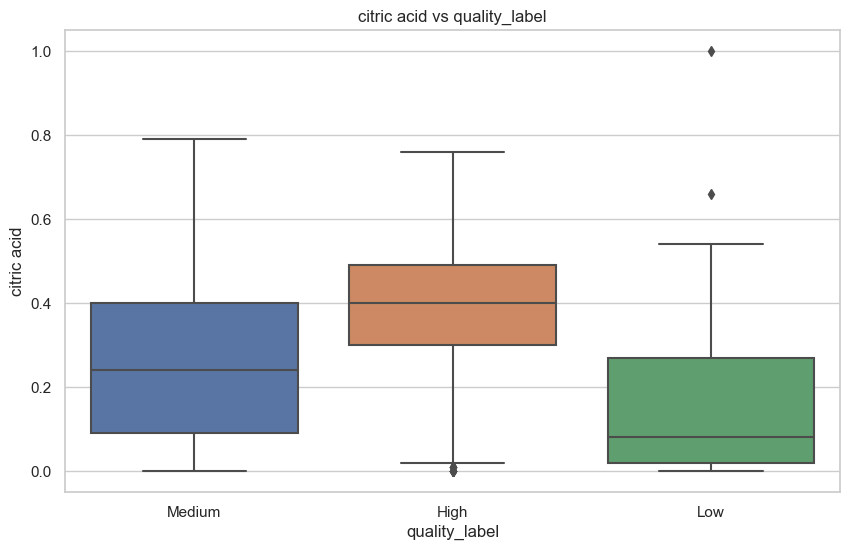

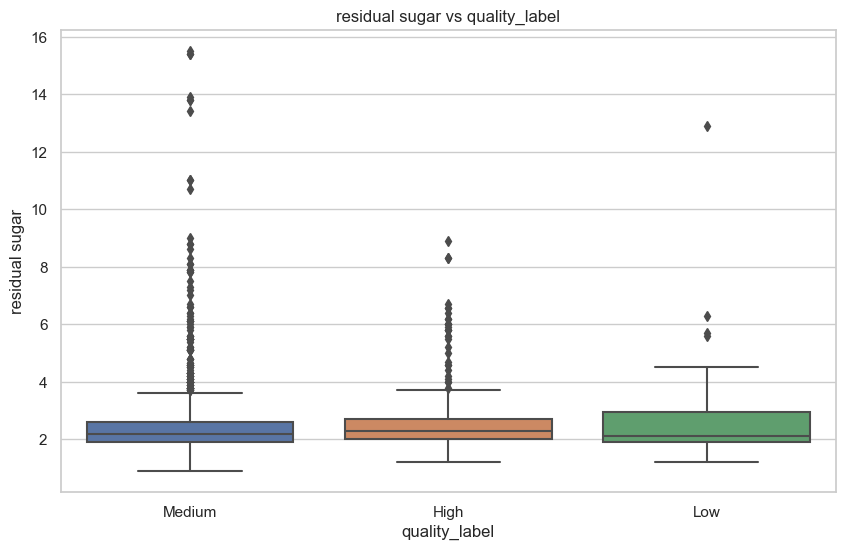

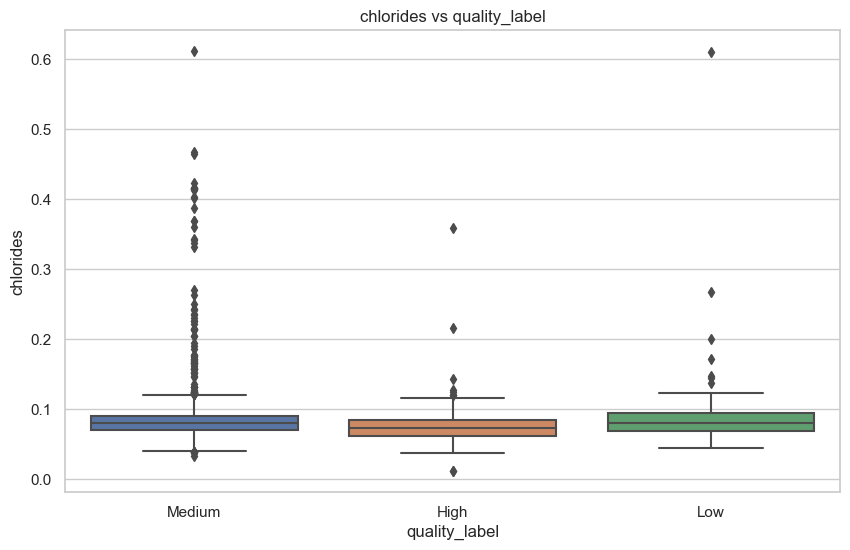

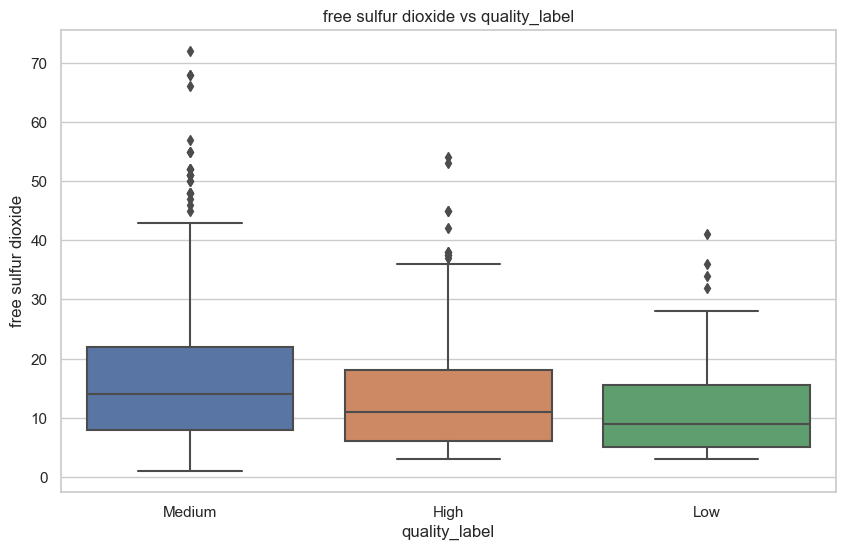

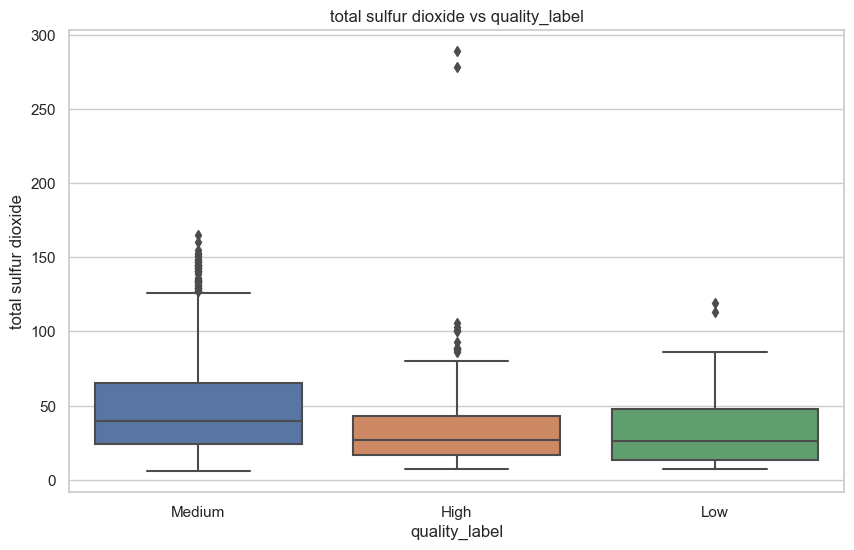

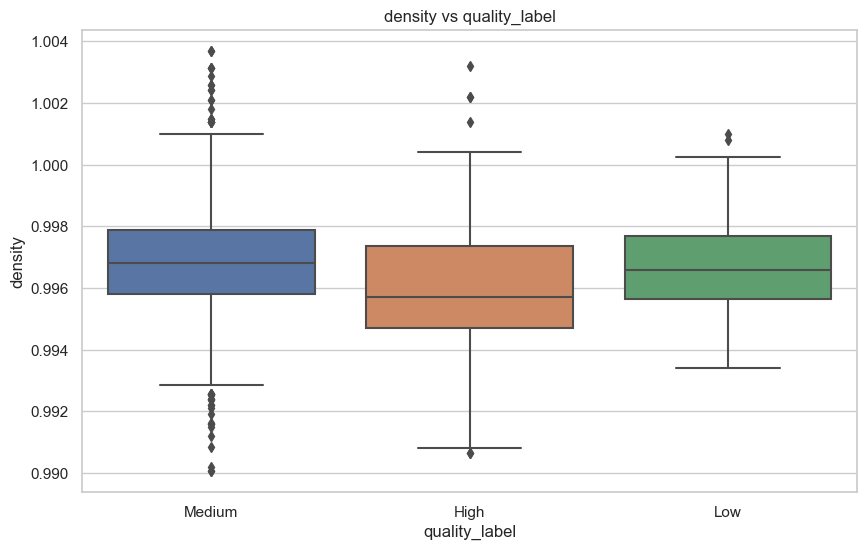

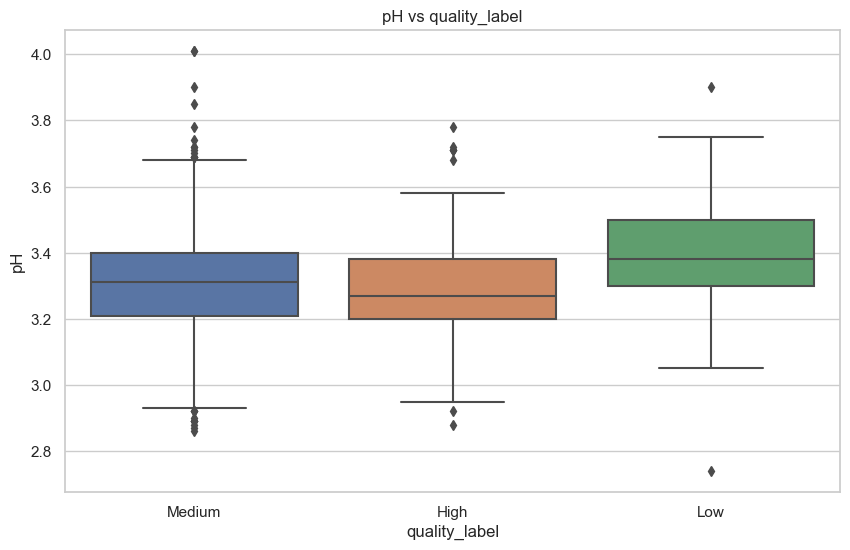

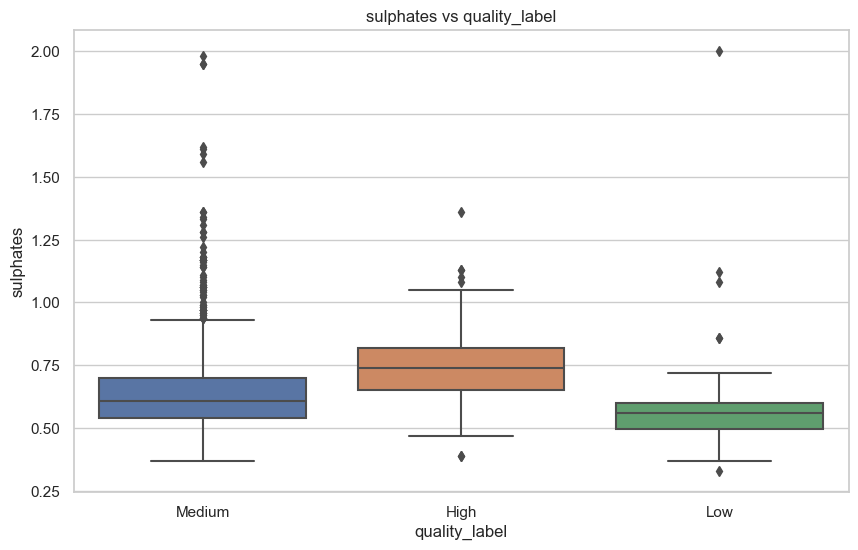

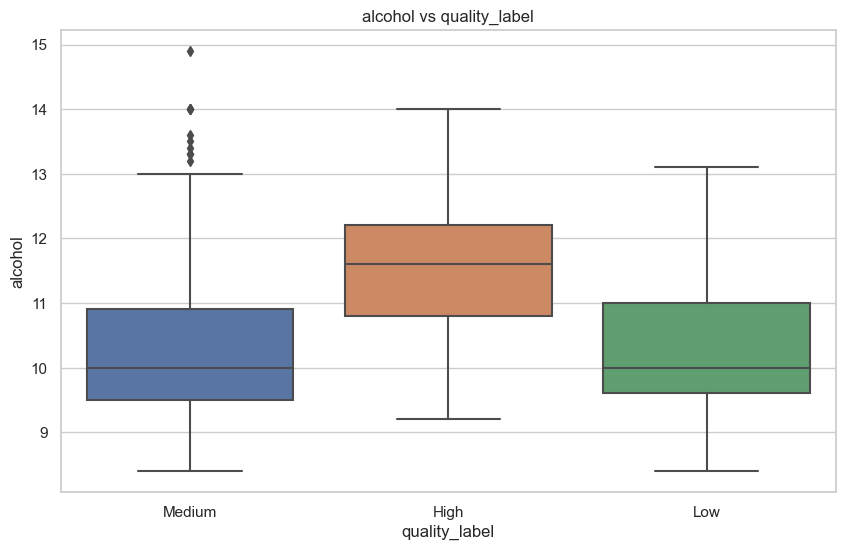


--- Multivariate Analysis ---


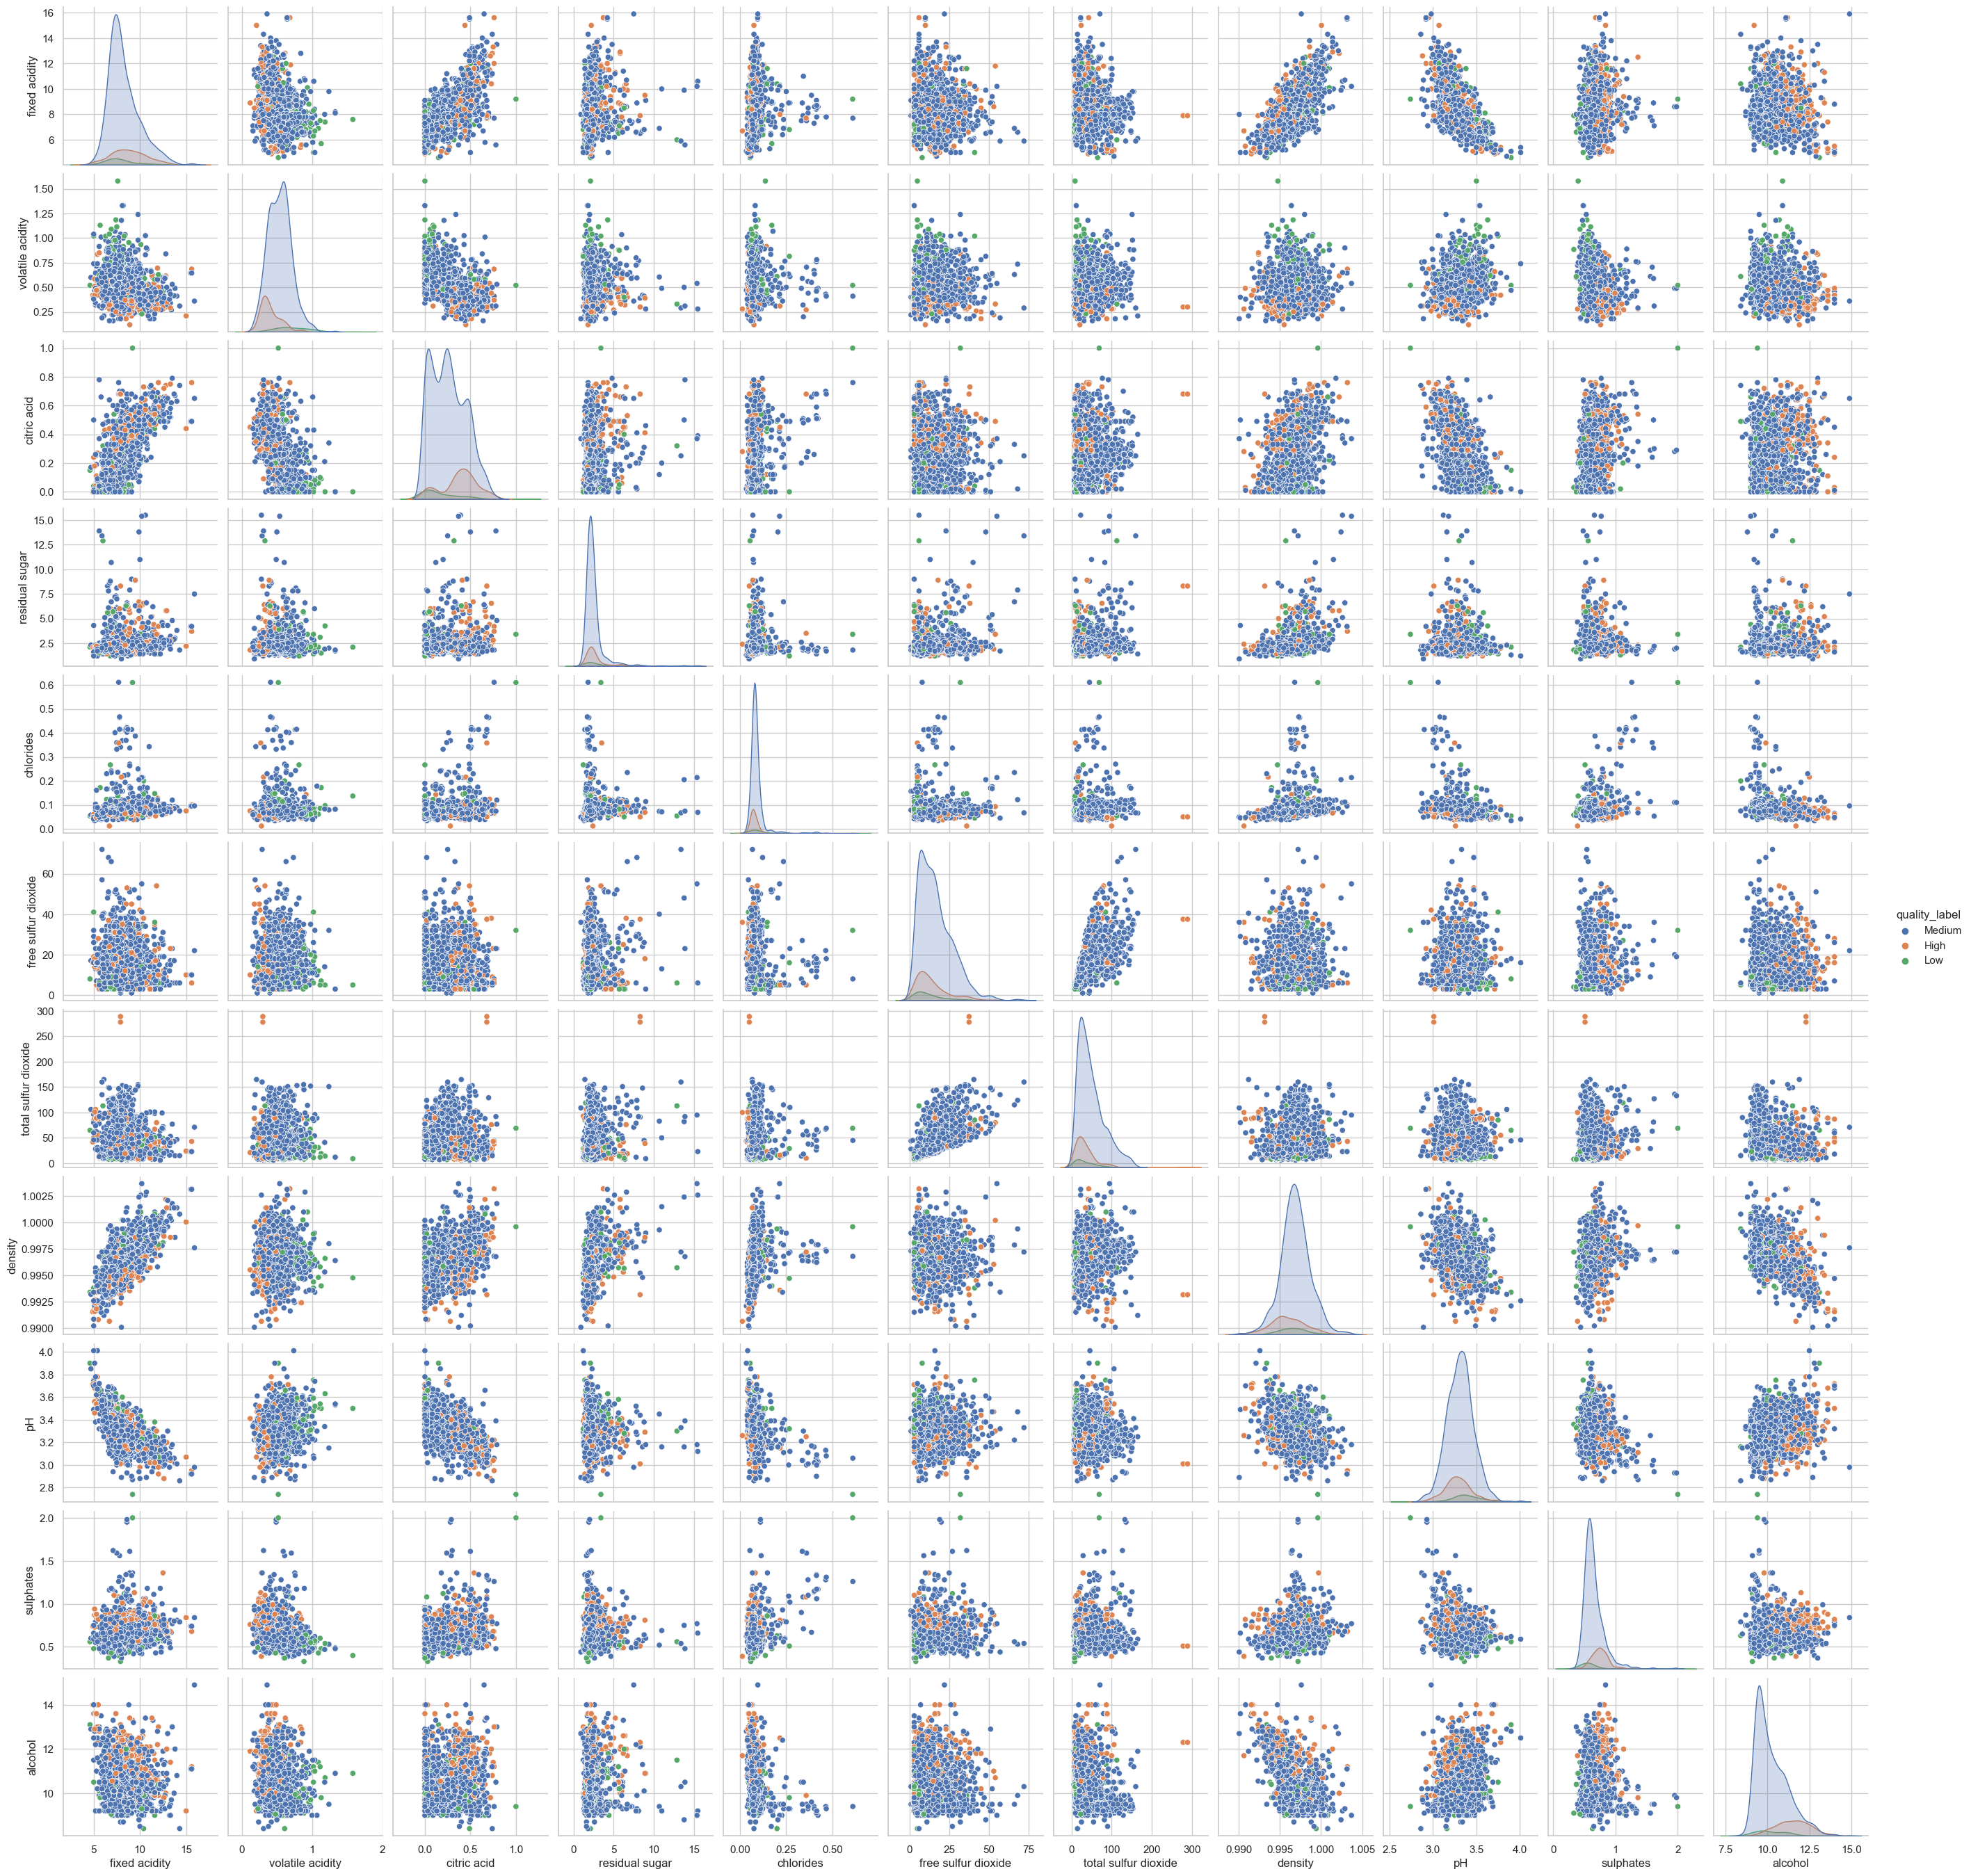


--- Significance Testing ---
ANOVA for fixed acidity and quality_label: Stat = 13.1685, p-value = 0.0000
  -> Significant difference in fixed acidity across quality_label

ANOVA for volatile acidity and quality_label: Stat = 102.4040, p-value = 0.0000
  -> Significant difference in volatile acidity across quality_label

ANOVA for citric acid and quality_label: Stat = 44.8406, p-value = 0.0000
  -> Significant difference in citric acid across quality_label

ANOVA for residual sugar and quality_label: Stat = 2.3236, p-value = 0.0983
  -> No significant difference in residual sugar across quality_label

ANOVA for chlorides and quality_label: Stat = 8.2597, p-value = 0.0003
  -> Significant difference in chlorides across quality_label

ANOVA for free sulfur dioxide and quality_label: Stat = 9.3009, p-value = 0.0001
  -> Significant difference in free sulfur dioxide across quality_label

ANOVA for total sulfur dioxide and quality_label: Stat = 21.9570, p-value = 0.0000
  -> Significant dif

In [18]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = load_data(url)

print("\n--- missing value analysis ---")
analyze_missing_values(df)

print("\n--- Univariate Analysis ---")
univariate_analysis(df)

print("\n--- Bivariate Analysis ---")
bivariate_analysis(df)

print("\n--- Multivariate Analysis ---")
multivariate_analysis(df)

print("\n--- Significance Testing ---")
significance_testing(df)


# **Data Preprocessing and Splitting**

## **Overview**
This section covers **data preprocessing, encoding, splitting, and resampling** to prepare the dataset for machine learning. Feature transformation and resampling techniques are applied to enhance model performance and address class imbalance. 

## **Objectives**
- **Preprocess features** using polynomial transformation and scaling.
- **Encode categorical labels** into numerical format for model compatibility.
- **Split the dataset** into training and test sets while maintaining class distribution.
- **Handle class imbalance** using **SMOTE (Synthetic Minority Over-sampling Technique)** to create a balanced training dataset.


In [20]:
# Preprocess data
X_poly, y = preprocess_features(df)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Resample training data
X_train_res, y_train_res = resample_data(X_train, y_train, method='SMOTE')

After SMOTE resampling, class distribution:
 2    1055
0    1055
1    1055
Name: count, dtype: int64


# **Model Selection and Hyperparameter Tuning**

## **Overview**
This section focuses on defining various **machine learning models** and performing **hyperparameter tuning** to optimize model performance. Multiple classification algorithms, including **Logistic Regression, Random Forest, Gradient Boosting, SVC, XGBoost, LightGBM, and CatBoost**, are implemented. Special attention is given to **XGBoost**, where a **randomized hyperparameter search** is conducted to find the best-performing model configuration.

## **Objectives**
- **Define a diverse set of classification models** to compare performance.
- **Optimize XGBoost hyperparameters** using **RandomizedSearchCV** to improve accuracy.
- **Identify the best model** for the given dataset by tuning key parameters such as **learning rate, max depth, and number of estimators**.
- **Store the best-performing XGBoost model** for further evaluation and comparison with other models.


In [22]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.pipeline import make_pipeline

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# Twelfth cell - Tune XGBoost
xgb_param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

print("\n--- Hyperparameter Tuning for XGBoost ---")
best_xgb = hyperparameter_tuning(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    xgb_param_dist, X_train_res, y_train_res, cv=3, n_iter=10)
models['XGBoost_Tuned'] = best_xgb


--- Hyperparameter Tuning for XGBoost ---


/Users/evinjoy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [07:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/evinjoy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [07:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/evinjoy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [07:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/evinjoy/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [07:48:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters:  {'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2}
Best CV score: 0.9529


# **Model Evaluation and Interpretability**

## **Overview**
This section evaluates the performance of different machine learning models using various **classification metrics** and conducts **SHAP analysis** to interpret model predictions. The evaluation covers both individual models and an **ensemble stacking model**, providing insights into their effectiveness. Additionally, **SHAP (SHapley Additive exPlanations)** is used to analyze feature importance in the best-performing model.

## **Objectives**
- **Evaluate multiple models** on test data using key classification metrics.
- **Compare model performance** through accuracy, precision, recall, and confusion matrix.
- **Assess the effectiveness of stacking ensemble learning** in improving prediction accuracy.
- **Perform SHAP analysis** to understand feature contributions in the XGBoost model.
- **Select the best-performing model** based on evaluation results for deployment or further optimization.



--- Model Evaluation ---

Evaluating model: Logistic Regression
Accuracy: 0.7281
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.74      0.55        43
           1       0.06      0.15      0.09        13
           2       0.92      0.75      0.83       264

    accuracy                           0.73       320
   macro avg       0.47      0.55      0.49       320
weighted avg       0.82      0.73      0.76       320

Confusion Matrix:
 [[ 32   3   8]
 [  2   2   9]
 [ 39  26 199]]
Macro ROC AUC: 0.7431

Evaluating model: Random Forest
Accuracy: 0.8469
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64        43
           1       0.33      0.15      0.21        13
           2       0.91      0.91      0.91       264

    accuracy                           0.85       320
   macro avg       0.61      0.59      0.59       320
weighted avg       0.84   

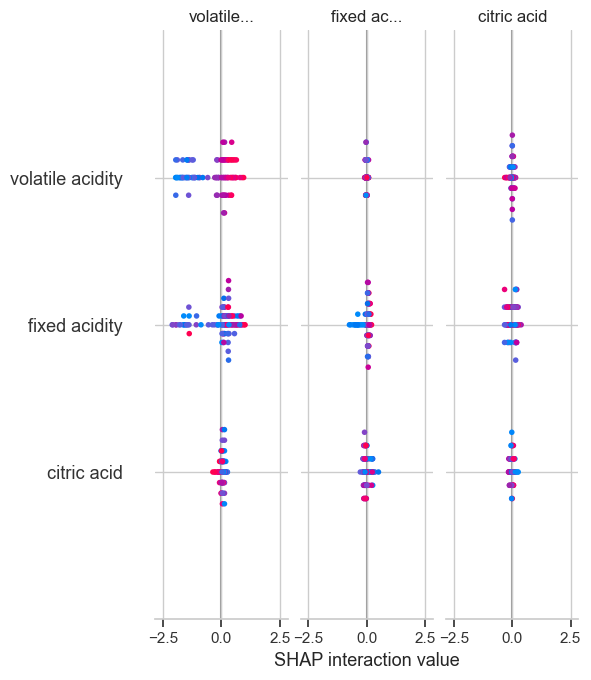

In [24]:
print("\n--- Model Evaluation ---")
for name, model in models.items():
    print("\n" + "="*50)
    print("Evaluating model:", name)
    pipeline = make_pipeline(model)
    pipeline.fit(X_train_res, y_train_res)
    evaluate_model(pipeline, X_test, y_test)

# Fourteenth cell - Evaluate stacking ensemble
print("\n" + "="*50)
print("Evaluating Stacking Ensemble")
stacking_model = stacking_ensemble(X_train_res, y_train_res)
evaluate_model(stacking_model, X_test, y_test)

# Fifteenth cell - SHAP analysis
print("\n--- SHAP Analysis on Tuned XGBoost ---")
X_sample = X_test.sample(n=100, random_state=42)
shap_analysis(best_xgb, X_sample)

## **Conclusion**
This project demonstrated a complete **machine learning pipeline** for **wine quality classification**, including:
- **Data preprocessing** (handling missing values, scaling, feature engineering)
- **Exploratory Data Analysis (EDA)**
- **Class imbalance handling** using **SMOTE**
- **Model training and evaluation**
- **Hyperparameter tuning** using **RandomizedSearchCV**
- **Ensemble learning** with **stacking**
- **Feature importance** using **SHAP**

Among the models tested, **ensemble learning methods (Random Forest, XGBoost, CatBoost)** provided the best accuracy. This pipeline can be extended for further optimization using **deep learning** or **automated machine learning (AutoML).**
